In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
def plot_roc(y_test, arg_name, label_proba):
    lw = 2
    plt.figure(figsize=(8,8))
    plt.grid()
    plt.plot([6.42260758e-04, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    marker = ['p','P','v','x','^','<','>','1','2','3','4','8','s','d']

    for data in zip(arg_name, label_proba, marker):
        y_score = data[1][:,1]
        fpr,tpr,threshold = roc_curve(y_test, y_score,pos_label=1)
        roc_auc = auc(fpr,tpr)
        plt.plot(fpr, tpr, lw=lw, label='ROC curve of %s ' % (data[0]),marker=data[2])

    plt.semilogx(base=10)      
    plt.legend(loc="lower right")
    plt.show()

arg_name = []
label_proba = []
accuracy = []

In [33]:
data = pd.read_csv('Data/Phishing_BestFirst.csv')
data

,domain_token_count,tld,urlLen,domainlength,fileNameLen,pathurlRatio,NumberofDotsinURL,Query_DigitCount,LongestPathTokenLength,delimeter_Domain,delimeter_path,SymbolCount_Domain,Entropy_Domain,class
0,19.0,19.0,168.0,121.0,2.0,0.23810,18.0,-1.0,32.0,1.0,0.0,18.0,0.61232,phishing
1,15.0,15.0,199.0,121.0,5.0,0.35678,15.0,-1.0,32.0,0.0,3.0,14.0,0.63250,phishing
2,15.0,15.0,199.0,121.0,5.0,0.35678,15.0,-1.0,32.0,0.0,3.0,14.0,0.63250,phishing
3,14.0,14.0,88.0,80.0,2.0,0.01136,13.0,-1.0,0.0,0.0,0.0,13.0,0.65863,phishing
4,13.0,13.0,182.0,125.0,5.0,0.27473,13.0,-1.0,7.0,0.0,1.0,12.0,0.70460,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,2.0,2.0,114.0,11.0,2.0,0.84211,1.0,-1.0,40.0,0.0,0.0,1.0,0.68466,phishing
15363,2.0,2.0,110.0,11.0,2.0,0.83636,1.0,-1.0,36.0,0.0,0.0,1.0,0.68466,phishing
15364,2.0,2.0,147.0,20.0,5.0,0.81633,4.0,-1.0,22.0,0.0,10.0,1.0,0.67753,phishing
15365,2.0,2.0,56.0,11.0,2.0,0.67857,1.0,-1.0,12.0,0.0,1.0,1.0,0.66482,phishing


In [34]:
data.loc[data['class']=='benign','class'] = 0
data.loc[data['class']=='phishing','class'] = 1
data = data.fillna(data.mean())
data['class'].value_counts()

0    7781
1    7586
Name: class, dtype: int64

In [35]:
y = data.pop('class')
X = data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train

,domain_token_count,tld,urlLen,domainlength,fileNameLen,pathurlRatio,NumberofDotsinURL,Query_DigitCount,LongestPathTokenLength,delimeter_Domain,delimeter_path,SymbolCount_Domain,Entropy_Domain
4043,3.0,3.0,113.0,14.0,2.0,0.81416,3.0,-1.0,32.0,0.0,6.0,2.0,0.79823
8788,2.0,2.0,40.0,13.0,9.0,0.50000,2.0,-1.0,9.0,0.0,1.0,1.0,0.91685
6189,2.0,2.0,115.0,11.0,2.0,0.84348,1.0,-1.0,82.0,0.0,10.0,1.0,1.00000
3980,3.0,3.0,61.0,16.0,27.0,0.62295,3.0,-1.0,27.0,0.0,3.0,2.0,0.80071
3272,3.0,3.0,70.0,19.0,2.0,0.62857,10.0,-1.0,32.0,1.0,1.0,2.0,0.81719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,2.0,2.0,83.0,13.0,49.0,0.75904,2.0,-1.0,49.0,0.0,11.0,1.0,0.87528
7221,2.0,2.0,69.0,11.0,39.0,0.73913,2.0,-1.0,39.0,0.0,2.0,1.0,0.94744
1318,3.0,3.0,69.0,13.0,25.0,0.71015,5.0,-1.0,13.0,0.0,4.0,2.0,0.91685
8915,2.0,2.0,40.0,13.0,9.0,0.50000,2.0,-1.0,9.0,0.0,1.0,1.0,0.91685


In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
label_predict_RF = model.predict(X_test)
label_predict_RF

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [39]:
accuracy_score(y_test, label_predict_RF)
accuracy.append(accuracy_score(y_test, label_predict_RF))

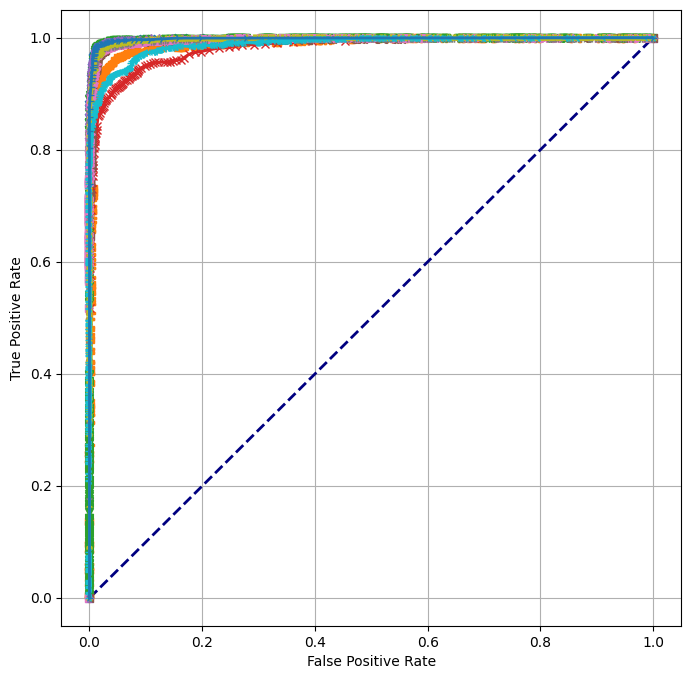

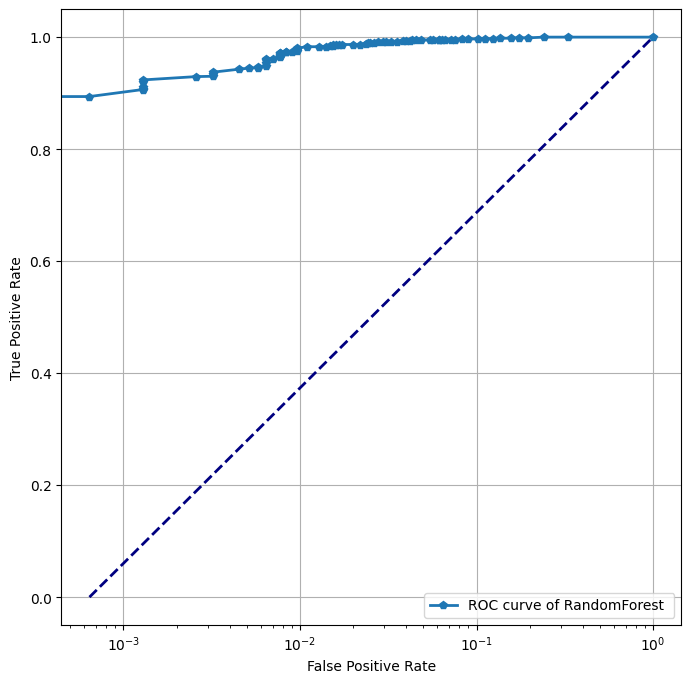

In [40]:
label_proba_RF = model.predict_proba(X_test)
arg_name.append('RandomForest')
label_proba.append(label_proba_RF)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

In [41]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [42]:
label_predict_SVM = model.predict(X_test)
label_predict_SVM

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [43]:
accuracy_score(y_test,label_predict_SVM)
accuracy.append(accuracy_score(y_test, label_predict_SVM))

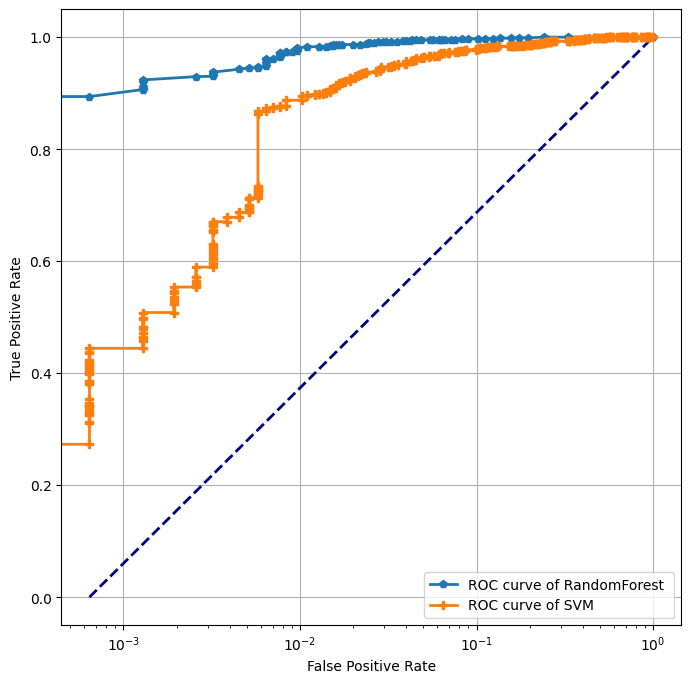

In [44]:
label_proba_SVM = model.predict_proba(X_test)
arg_name.append('SVM')
label_proba.append(label_proba_SVM)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

In [45]:
model = XGBClassifier()
model.fit(X_train, y_train)

E:\Anaconda\envs\ml-networking\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
label_predict_XGBoost = model.predict(X_test)
label_predict_XGBoost

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
accuracy_score(y_test,label_predict_XGBoost)
accuracy.append(accuracy_score(y_test, label_predict_XGBoost))

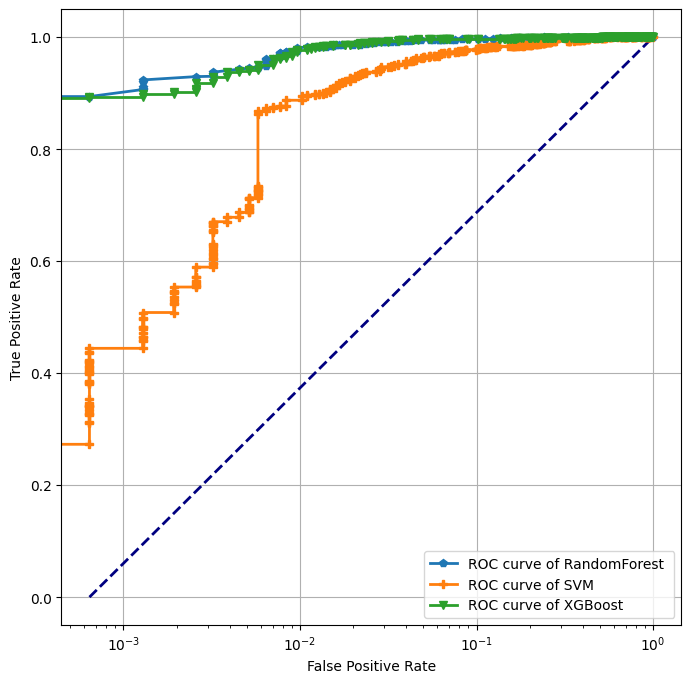

In [48]:
label_proba_XGBoost = model.predict_proba(X_test)
arg_name.append('XGBoost')
label_proba.append(label_proba_XGBoost)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

In [49]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [50]:
label_predict_KNN = model.predict(X_test)
label_predict_KNN

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [51]:
accuracy_score(y_test,label_predict_KNN)
accuracy.append(accuracy_score(y_test, label_predict_KNN))

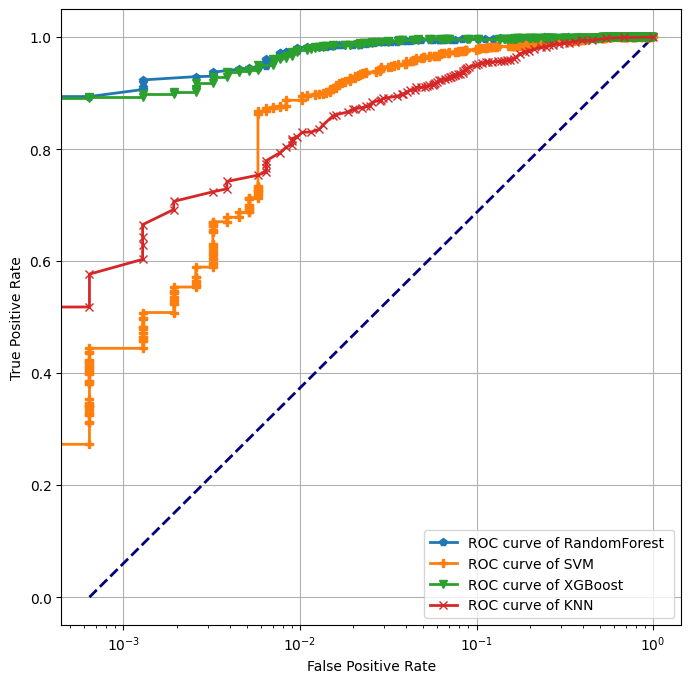

In [52]:
label_proba_KNN = model.predict_proba(X_test)
arg_name.append('KNN')
label_proba.append(label_proba_KNN)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9853610930383865


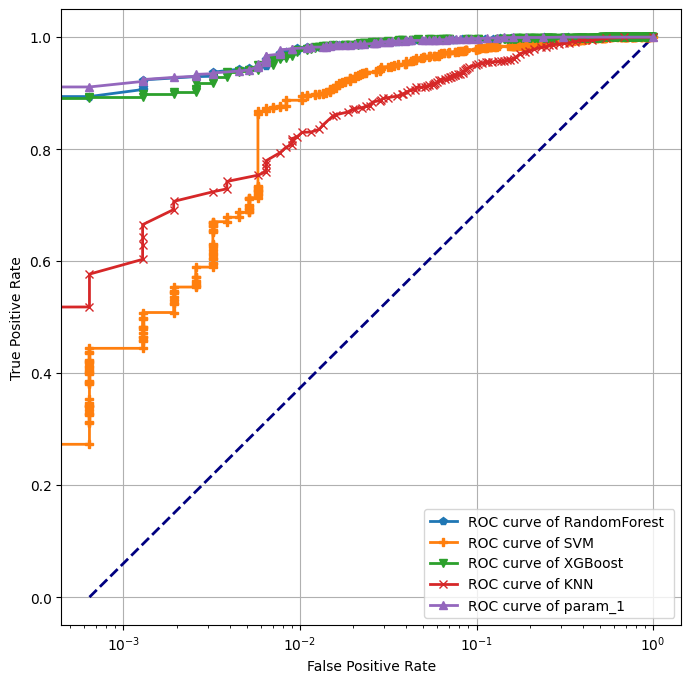

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
label_predict_RF_1 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_1)))
accuracy.append(accuracy_score(y_test, label_predict_RF_1))
label_proba_RF_1 = model.predict_proba(X_test)
arg_name.append('param_1')
label_proba.append(label_proba_RF_1)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9674690956408588


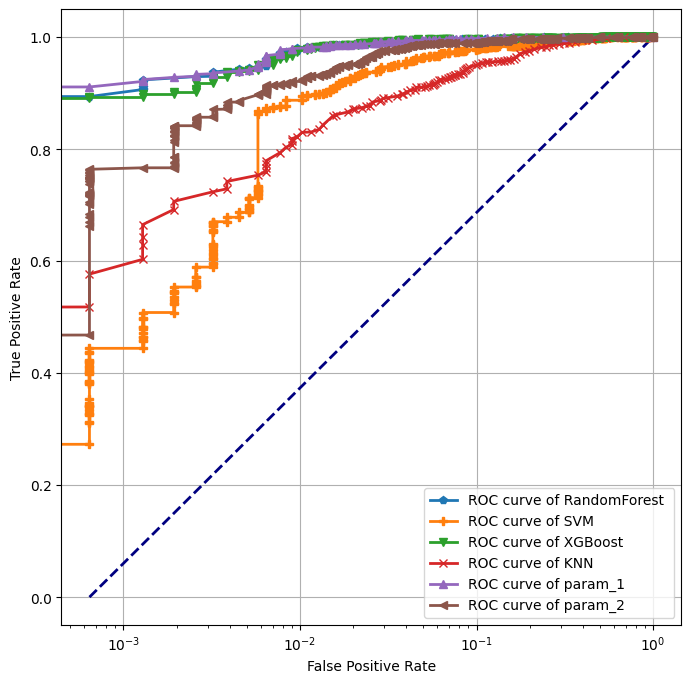

In [54]:
model = RandomForestClassifier(n_estimators=5,max_depth=10,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_2 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_2)))
accuracy.append(accuracy_score(y_test, label_predict_RF_2))
label_proba_RF_2 = model.predict_proba(X_test)
arg_name.append('param_2')
label_proba.append(label_proba_RF_2)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9759271307742355


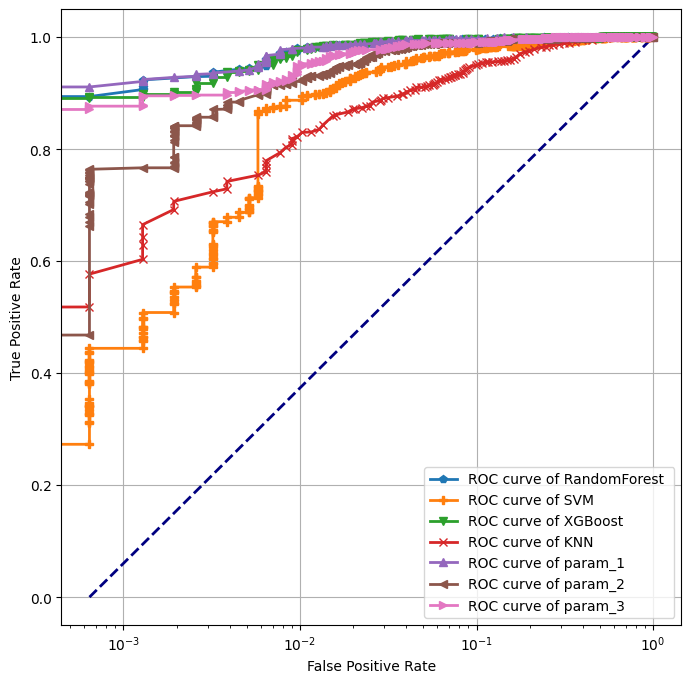

In [55]:
model = RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_3 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_3)))
accuracy.append(accuracy_score(y_test, label_predict_RF_3))
label_proba_RF_3 = model.predict_proba(X_test)
arg_name.append('param_3')
label_proba.append(label_proba_RF_3)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9765777488614183


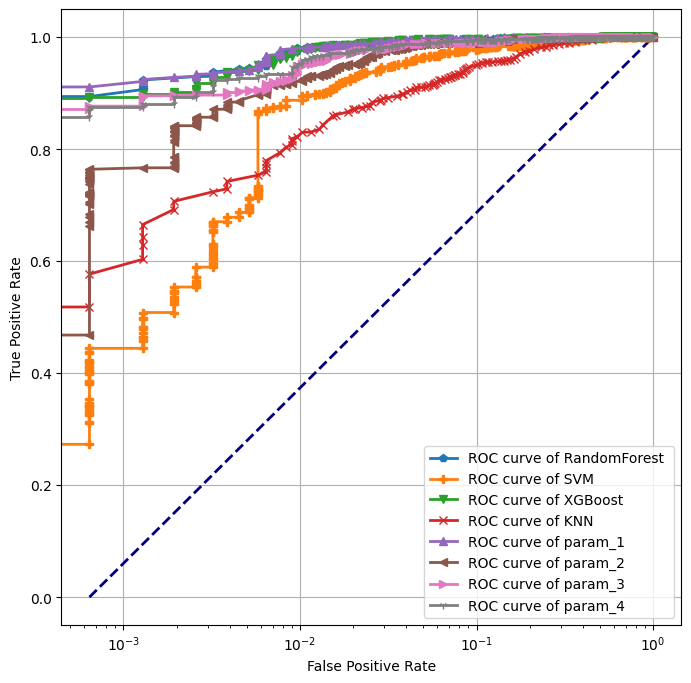

In [56]:
model = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_4 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_4)))
accuracy.append(accuracy_score(y_test, label_predict_RF_4))
label_proba_RF_4 = model.predict_proba(X_test)
arg_name.append('param_4')
label_proba.append(label_proba_RF_4)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.976252439817827


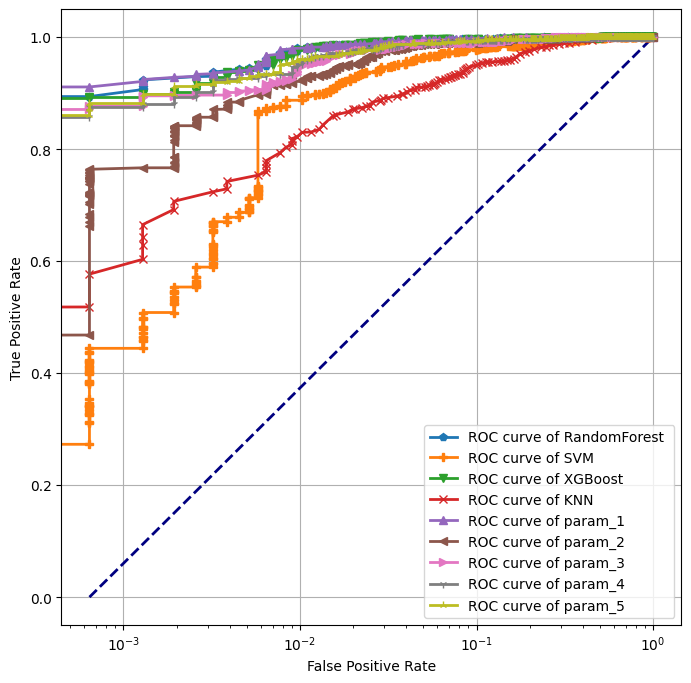

In [57]:
model = RandomForestClassifier(n_estimators=60,max_depth=10,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_5 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_5)))
accuracy.append(accuracy_score(y_test, label_predict_RF_5))
label_proba_RF_5 = model.predict_proba(X_test)
arg_name.append('param_5')
label_proba.append(label_proba_RF_5)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9486011711125569


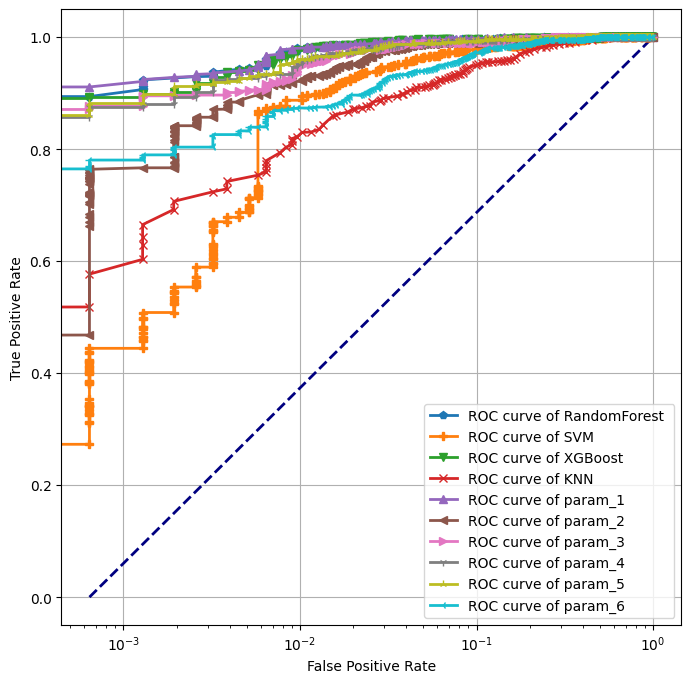

In [58]:
model = RandomForestClassifier(n_estimators=60,max_depth=5,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_6 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_6)))
accuracy.append(accuracy_score(y_test, label_predict_RF_6))
label_proba_RF_6 = model.predict_proba(X_test)
arg_name.append('param_6')
label_proba.append(label_proba_RF_6)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9840598568640209


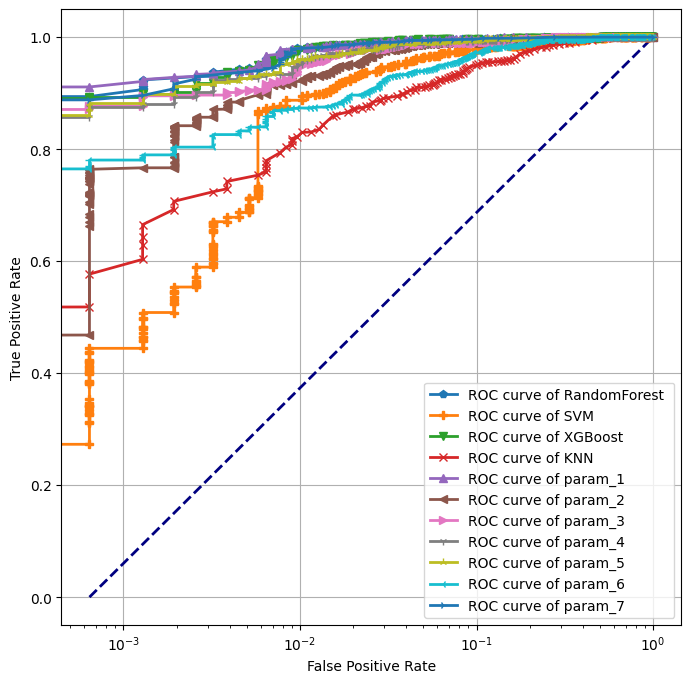

In [59]:
model = RandomForestClassifier(n_estimators=60,max_depth=50,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_7 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_7)))
accuracy.append(accuracy_score(y_test, label_predict_RF_7))
label_proba_RF_7 = model.predict_proba(X_test)
arg_name.append('param_7')
label_proba.append(label_proba_RF_7)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9843851659076123


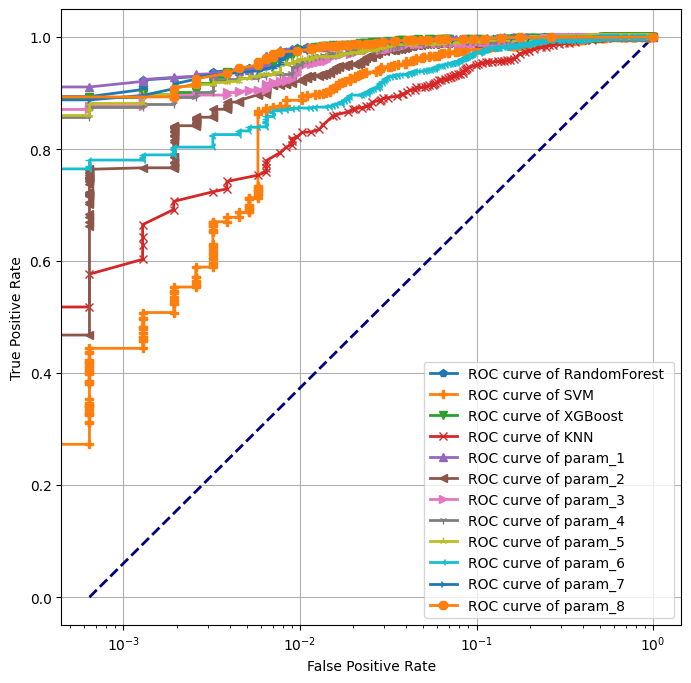

In [60]:
model = RandomForestClassifier(n_estimators=50,max_depth=60,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_8 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_8)))
accuracy.append(accuracy_score(y_test, label_predict_RF_8))
label_proba_RF_8 = model.predict_proba(X_test)
arg_name.append('param_8')
label_proba.append(label_proba_RF_8)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

accuracy score:0.9853610930383865


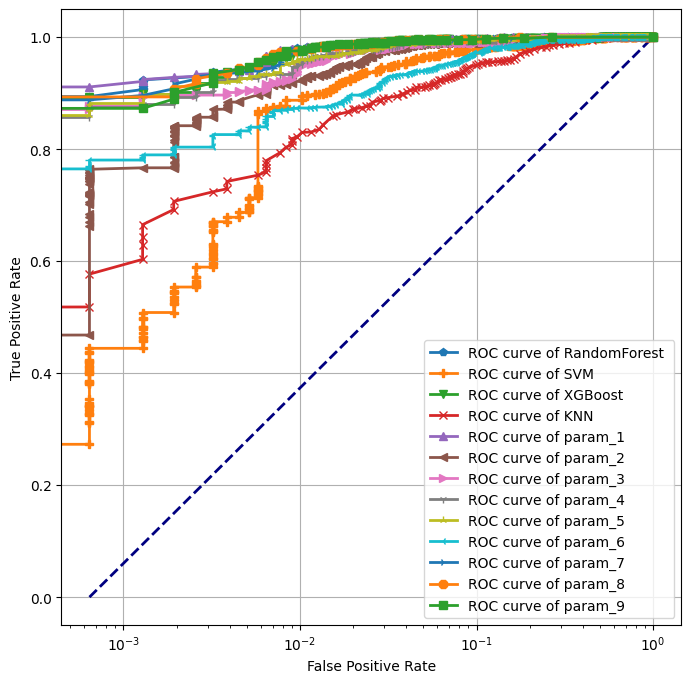

In [61]:
model = RandomForestClassifier(n_estimators=50,max_depth=40,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train, y_train)
label_predict_RF_9 = model.predict(X_test)
print("accuracy score:"+str(accuracy_score(y_test, label_predict_RF_9)))
accuracy.append(accuracy_score(y_test, label_predict_RF_9))
label_proba_RF_9 = model.predict_proba(X_test)
arg_name.append('param_9')
label_proba.append(label_proba_RF_9)
plot_roc(y_test=y_test, label_proba=label_proba,arg_name=arg_name)

In [63]:
max_acc = max(accuracy)
max_index = accuracy.index(max_acc)
print(f"The max accuracy is {max_acc}, the index is {max_index}.")
accuracy

The max accuracy is 0.9853610930383865, the index is 4.


[0.9847104749512037,
 0.9567338972023423,
 0.9843851659076123,
 0.9303838646714379,
 0.9853610930383865,
 0.9674690956408588,
 0.9759271307742355,
 0.9765777488614183,
 0.976252439817827,
 0.9486011711125569,
 0.9840598568640209,
 0.9843851659076123,
 0.9853610930383865]